Reading file "../data/ADI_bcc_fcc.ang"...
# GRID: HexGrid
# XSTEP: 0.100000
# YSTEP: 0.086603
# NCOLS_ODD: 701
# NCOLS_EVEN: 700
# NROWS: 809

566705 points read in 0.98 s


Select area and press SHIFT or ENTER to continue


<IPython.core.display.Javascript object>


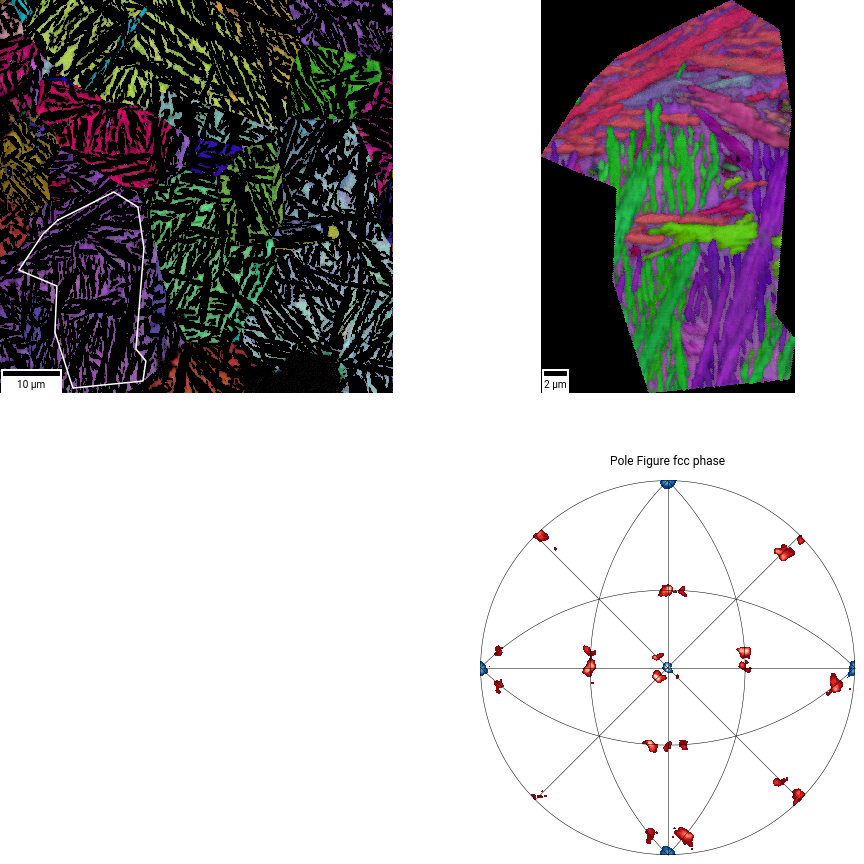

Calculating rotation matrices... 0.14 s
Plotting Inverse Pole Figure... 0.47 s


In [1]:
import os
import pyebsd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# .ang file available in the data folder
# Replace angfile variable with the path to your .ang file
angfile = os.path.join('..', 'data', 'ADI_bcc_fcc.ang')
# angfile = os.path.join('..', 'data', 'QP_bcc_fcc_single_austenite_grain.ang')

# load ebsd scandata
# So far, pyebsd only supports loading .ang files generated
# by the TSL OIM software
scan = pyebsd.load_scandata(angfile)

print('\n\n\033[1mSelect area and press SHIFT or ENTER to continue\033[0m')

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
ax1, ax2, ax3, ax4 = axes.ravel()
ax3.axis('off')

# Plot IPF map for only the fcc phase (ph == 2)
ipf = scan.plot_IPF(sel=(scan.ph == 2), gray=scan.IQ, ax=ax1)

# Enable lasso_selector. Click with the mouse in the open IPF
# plot and select an area.
# Use the left button to create a new vertex and the right button
# to close the loop.
ipf.lasso_selector()

def onkeypress(event):
    if event.key != 'shift' and event.key != 'enter':
        return

    if np.count_nonzero(ipf.sel) > 0:
        # Calculate average orientation of fcc phase in selection
        M_fcc = pyebsd.average_orientation(scan.M,
                                           sel=ipf.sel & (scan.ph == 2) & (scan.CI > .2),
                                           vectorized=False, verbose=True)

        # plot IPF of the selected data
        ax2.cla()  # clear axis
        scan.plot_IPF(sel=ipf.sel, gray=scan.IQ, tiling='hex', ax=ax2)
        
        ax4.cla()  # clear axis
        ax4.set_aspect('equal')
        ax4.axis('off')
        pyebsd.draw_circle_frame(ax4, lw=.5)
        pyebsd.draw_std_traces(ax4, lw=.5)
        
        # Plot IPF map of the selected area
        ipfselection = scan.plot_IPF(sel=ipf.sel, gray=scan.IQ)

        # Plot pole figure of the bcc phase in the selected area
        # rotation=M_fcc.T is used to rotate pole figure so axes
        # match with fcc 100, 010, and 001 directions
        pfbcc = scan.plot_PF(sel=ipf.sel & (scan.ph == 1), contour=True, 
                             cmap=plt.get_cmap('Reds_r'), rotation=M_fcc.T, ax=ax4)
        pfbcc.set_title('Pole Figure bcc phase')

        # Plot pole figure of the fcc phase in the selected area
        pffcc = scan.plot_PF(sel=ipf.sel & (scan.ph == 2), contour=True, 
                             cmap=plt.get_cmap('Blues_r'), rotation=M_fcc.T, ax=ax4)
        pffcc.set_title('Pole Figure fcc phase')

        plt.draw_all()

cid = fig.canvas.mpl_connect('key_press_event', onkeypress)

plt.show()